# Exercise 8: Coding and visualizing geostatistics (17 points)

The exercise this week will allow you to gain some experience with basic geostatistics by creating some Python functions for performing common statistical calculations and analyzing data from the [Smithsonian Institution's Global Volcanism Program](https://volcano.si.edu/).

One of the goals of this part of the course is to develop your quantitative geoscience skills, including learning how to convert mathematical equations to Python code. Doing this allows you to explore how various equations work and produce useful data plots or predictions, something increasingly done by geoscience professionals.

You'll use functions to calculate some statistics related to Holocene volcanoes from the [Smithsonian Institution's Global Volcanism Program](https://volcano.si.edu/).

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Properly converting the Gaussian formula to a Python function and saving them in the Python script file `gdam_functions.py`
 - **Note**:  ~~You should not use existing Python, Pandas or NumPy functions in the functions you create, other than perhaps a function for calculating the square root~~
- Including comments that explain what most lines in the code do
- Uploading your notebook and script file to your GitHub repository for this week's exercise

## Problem 1: Analyzing volcano data (8 points)

In this problem we'll utilize the functions generated in Problem 1 to calculate some statistics related to Holocene volcanoes from the [Smithsonian Institution's Global Volcanism Program](https://volcano.si.edu/).

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Reading and processing the [data file](data/GVP_Volcano_List_Holocene.csv)
- Cleaning the raw data as instructed
- Creating a new DataFrame of regional volcano statistics
- Including comments that explain what most lines in the code do
- Answering a couple questions at the end of the problem
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 1: Reading the data file (1.5 points)

The first step in this exercise is to read in the [data file](data/GVP_Volcano_List_Holocene.csv) we're using. 

- For this, you should use the pandas `read_csv()` funtion to read in the data file [data/GVP_Volcano_List_Holocene.csv](data/GVP_Volcano_List_Holocene.csv) to the variable `data`
    - Use the semicolon character `;` as the separator between columns
    - Skip the first row

In [1]:
# YOUR CODE HERE
import pandas as pd
fp = "GVP_Volcano_List_Holocene.csv"
data = pd.read_csv(
    fp,
    sep=';',
    skiprows=[0]
)

In [2]:
# This test print should print the head and the column names
print(data.head(1))
print(data.columns)


   Volcano Number               Volcano Name  Country Primary Volcano Type  \
0          210010  West Eifel Volcanic Field  Germany              Maar(s)   

  Activity Evidence Last Known Eruption                          Region  \
0    Eruption Dated            8300 BCE  Mediterranean and Western Asia   

        Subregion  Latitude  Longitude  Elevation (m) Dominant Rock Type  \
0  Western Europe     50.17       6.85            600            Foidite   

                         Tectonic Setting  
0  Rift zone / Continental crust (>25 km)  
Index(['Volcano Number', 'Volcano Name', 'Country', 'Primary Volcano Type',
       'Activity Evidence', 'Last Known Eruption', 'Region', 'Subregion',
       'Latitude', 'Longitude', 'Elevation (m)', 'Dominant Rock Type',
       'Tectonic Setting'],
      dtype='object')


In [3]:
# This test print should print the first row of data
print(data.loc[0].values)


[210010 'West Eifel Volcanic Field' 'Germany' 'Maar(s)' 'Eruption Dated'
 '8300 BCE' 'Mediterranean and Western Asia' 'Western Europe' 50.17 6.85
 600 'Foidite' 'Rift zone / Continental crust (>25 km)']


In [4]:
# This test print should print the number of rows of data
print(f"The DataFrame contains {len(data)} rows.")


The DataFrame contains 1426 rows.


### Part 2: Preparing the data (1 point)

Before moving to using our statistical functions, we need to clean up our data a bit.

- Create a subset of the `data` dataframe called `clean_data` that contains only volcanoes with elevations at and above sea level
- Drop rows from the `clean_data` DataFrame with NaNs in the 'Tectonic Setting' column

In [5]:
# YOUR CODE HERE
clean_data = data[data["Elevation (m)"] >= 0].dropna(subset=['Tectonic Setting'])

In [6]:
# This test print should print the head
print(clean_data.head(1))


   Volcano Number               Volcano Name  Country Primary Volcano Type  \
0          210010  West Eifel Volcanic Field  Germany              Maar(s)   

  Activity Evidence Last Known Eruption                          Region  \
0    Eruption Dated            8300 BCE  Mediterranean and Western Asia   

        Subregion  Latitude  Longitude  Elevation (m) Dominant Rock Type  \
0  Western Europe     50.17       6.85            600            Foidite   

                         Tectonic Setting  
0  Rift zone / Continental crust (>25 km)  


In [7]:
# This test print should print the last 5 tectonic settings
print(clean_data["Tectonic Setting"].tail(5))


1420    Subduction zone / Oceanic crust (< 15 km)
1421    Subduction zone / Oceanic crust (< 15 km)
1422    Subduction zone / Oceanic crust (< 15 km)
1424      Intraplate / Continental crust (>25 km)
1425      Intraplate / Continental crust (>25 km)
Name: Tectonic Setting, dtype: object


### Part 3: Global volcano statistics (1 point)

With our clean data, we can now calculate some global statistical values for Holocene volcanoes.

- Calculate the mean elevation of all volcanoes in the `clean_data` DataFrame as variable `global_mean`
- Calculate the standard deviation in the elevation of all the volcanoes in the `clean_data` DataFrame as variable `global_stddev`
- Calculate the standard error in the elevation of all the volcanoes in the `clean_data` DataFrame as variable `global_stderr`

**Note**: You will need to use the `.values` attribute with the elevation data to calculate the requested values using the functions you created in Problem 1.

In [8]:
import numpy as np

global_mean = None
global_stddev = None
global_stderr = None

# YOUR CODE HERE
#assign a new variable to serve as values from clean data
elevation = clean_data['Elevation (m)'].values

global_mean = np.mean(elevation)
global_stddev = np.std(elevation)
# standard error is computed as the Standard deviation of the data divided by the square root of the total number of samples
global_stderr = global_stddev/np.sqrt(len(elevation)) 


In [9]:
# This should print the global mean volcano elevation
print(f"My global average volcano elevation is {global_mean} meters.")
print("The expected value is approximately 1922 meters.")


My global average volcano elevation is 1922.0274599542333 meters.
The expected value is approximately 1922 meters.


In [10]:
# This should print the global standard deviation in volcano elevation
print(f"My global standard deviation in volcano elevation is {global_stddev} meters.")
print("The expected value is approximately 1406 meters.")


My global standard deviation in volcano elevation is 1405.8497263569718 meters.
The expected value is approximately 1406 meters.


In [11]:
# This should print the global standard deviation in volcano elevation
print(f"My global standard error in volcano elevation is {global_stderr} meters.")
print("The expected value is approximately 39 meters.")


My global standard error in volcano elevation is 38.82733250071733 meters.
The expected value is approximately 39 meters.


### Part 4: Compiling regional volcano statistics (2 points)

Using an approach similar to that in Part 3, we can now calculate some statistics on volcanoes in various geographic regions.

- Create a variable `regions` that contains the unique 'Region' values from the `clean_data` DataFrame
- Using a `for` loop, loop over each region and append its mean, standard deviation, and standard error in volcano elevation to the empty list variables `means`, `stddevs`, and `stderrs`
    - **Note**: In your `for` loop you should first extract a subset of data using `.loc` to select the elevation values for the region of interest
    - You will also want to convert your subset of elevations to an array of values using the `.values` attribute before using your functions

In [12]:
means = []
stddevs = []
stderrs = []

# YOUR CODE HERE
ELEV = 'Elevation (m)' # Renamed for clarity
regions = clean_data['Region'].unique()

for region in regions:
    # Set the loop for elevation in a specific region using loc function
    elevation_data = clean_data.loc[clean_data['Region'] == region, ELEV].values.astype(float)
    
    # Calculate statistics 
    region_mean = np.mean(elevation_data) 
    region_stddev = np.std(elevation_data) 

    # Calculate Standard Error (SEM) and setting the E as shorthand for total number of elevation data
    E = len(elevation_data) 
    if E > 0:
        region_stderr = region_stddev / np.sqrt(E) # Fixed: Used N and region_stddev
    else:
        region_stderr = 0
# append the new values
    means.append(region_mean)
    stddevs.append(region_stddev)
    stderrs.append(region_stderr)
    

In [13]:
# This should print the last value in the regions array
print(f"The last region is {regions[-1]}.")


The last region is Antarctica.


In [14]:
# This should print the last value in the means list
print(f"The last mean value is {means[-1]} meters.")


The last mean value is 1670.0967741935483 meters.


In [15]:
# This should print the last value in the stddevs list
print(f"The last stddev value is {stddevs[-1]} meters.")


The last stddev value is 1209.1742678330506 meters.


In [16]:
# This should print the last value in the stderrs list
print(f"The last stderr value is {stderrs[-1]} meters.")


The last stderr value is 217.17410957715947 meters.


### Part 5: Creating a regional DataFrame (1.5 points)

The last step in this problem is to combine our new lists into a new Pandas DataFrame.

- Create a new DataFrame called `region_data` using `regions` as the index and the `means`, `stddevs`, and `stderrs` lists as the column data
    - **Hint**: When creating a DataFrame, column data can be specified in a dictionary using the `data` keyword (e.g., `data = {'Column heading': column_values}`), where `'Column heading'` would be the name of the column, and `column_values` would be the data in that column
    - **Hint**: The `index` parameter can be used to indicate the values to be used for the index

In [17]:
region_data = None

# YOUR CODE HERE
# 1. Create the dictionary mapping column names to the list data
data_dict = {
    'Mean elevation': means,
    'Standard Deviation': stddevs,
    'Standard Error': stderrs
}

#  Making DataFrame using the data dictionary and the regions list as the index
region_data = pd.DataFrame(
    data=data_dict,
    index=regions  
)



In [18]:
# This should print the last row in the region_data DataFrame
print(region_data.tail(1))


            Mean elevation  Standard Deviation  Standard Error
Antarctica     1670.096774         1209.174268       217.17411


In [19]:
# This should print the shape of the DataFrame
print(f"DataFrame dimensions: {region_data.shape}")


DataFrame dimensions: (19, 3)


In [20]:
# This should print mean elevation for Alaska
print(f"Alaska mean volcano elevation: {region_data['Mean elevation'].loc['Alaska']} meters.")


Alaska mean volcano elevation: 1500.4827586206898 meters.


### Part 6: Questions for Problem 2 (1 point)

1. How much do the standard deviation values vary among the regions? What do these values tell you about the volcano elevations in different regions?
2. Do you observe a large difference between the standard deviation and standard error values? Is it clear why you should always indicate whether reported values are standard deviations or standard errors?

##### The standard deviation vary especially in areas of active tectonics such as the volcanoes along the Pacific Ring of Fire. For the STD values, higher means that they are more unique, while lower means they have similarities

##### The SE is much smaller than the STD because SE is calculated by dividing STD by the square root of the number of samples, which is a large number for most regions. It is critically important because they answer different questions: STD measures the data spread (unique values), while SE measures the precision of the mean. Confusing the two would lead to a misleading representation of the data's true variability

## Problem 2: Visualizing uncertainty (9 points)

In this problem we will continue to develop our Python mathematical and plotting skills by visualizing the regional volcano data using bar plots and the *normal distribution*. The normal distribution is a mathematical function with a bell shape, also known as the *Gauss function* or *Gaussian*. This function is centered on the mean value of a given set of values, where its value is greatest, and its value decreases away from the mean in what is hopefully a familiar form.

### Scores for this problem

**Your score on this problem will be based on following criteria:**

- Creating bar plots of the regional volcano data
- Properly defining a function for calulating normal distributions
- Creating a new DataFrame of regional volcano elevation distributions
- Including comments that explain what most lines in the code do
- Answering a couple questions at the end of the problem
- Uploading your notebook to your GitHub repository for this week's exercise

### Part 1: A bar plot of our regional volcano data (*1.5 points*)

We'll start visualizing our volcano data by creating a bar plot of the mean elevations along with their standard deviations.

- Create a bar plot of the mean elevations in the `region_data` DataFrame, including the standard deviation in elevation as an error bar
    - The data for the error bars can be assigned using the `yerr` parameter in the `.plot()` function
    - We suggest you use a slightly larger figure size of 12 by 8 inches, which can be set using the `figsize` parameter in the `.plot()` function
- Include a title and label on the y-axis
- Also add a black, dashed line spanning the width of the plot and indicating the global mean volcano elevation
    - Check the hints for this week's exercise about how to add this line
- Be sure to show a plot legend
- Finally, add a figure caption in the Markdown cell below the Python cell for your plot that describes the plot as if it were in a scientific journal article

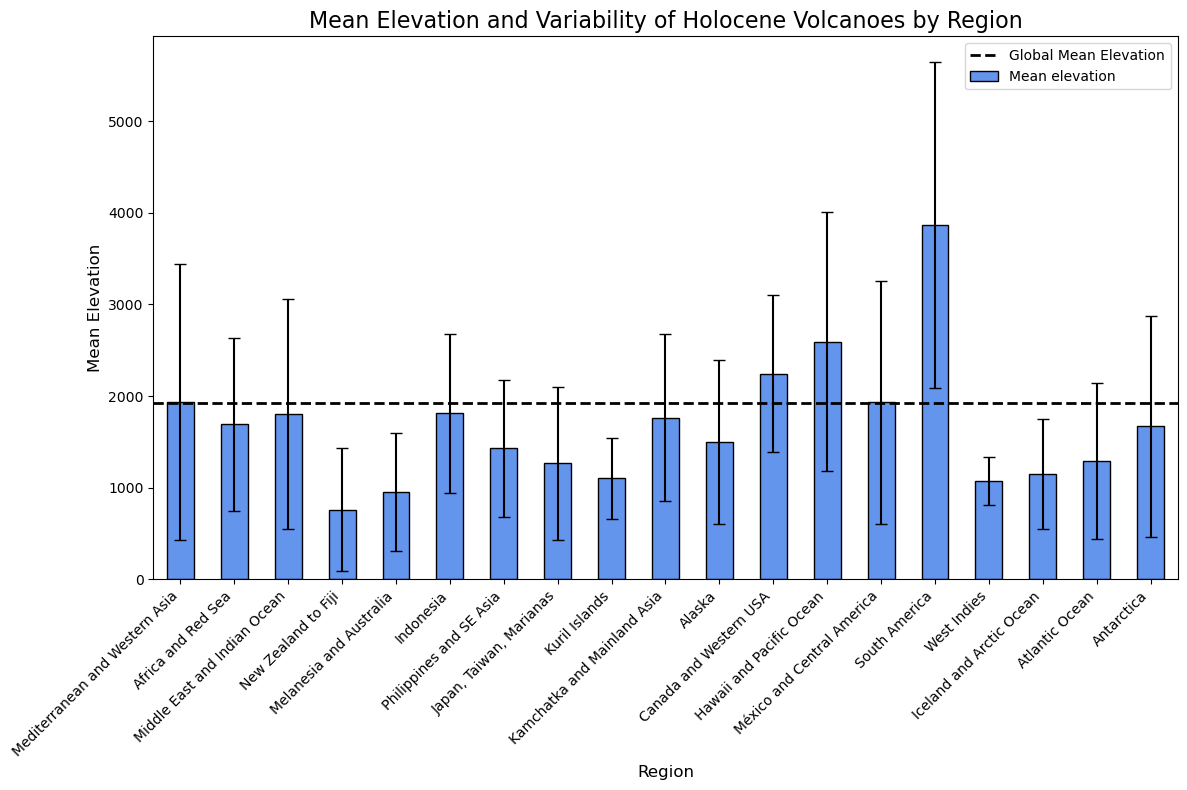

In [21]:
ax = None

# YOUR CODE HERE
import matplotlib.pyplot as plt

ax = region_data['Mean elevation'].plot(
    kind='bar',
    figsize=(12, 8),
    yerr=region_data['Standard Deviation'], # Standard Deviation as error bars
    capsize=4,
    color='#6495ED',
    edgecolor='black'
)

# Add global mean line
ax.axhline(
    global_mean, 
    color='black', 
    linestyle='--', 
    linewidth=2, 
    label='Global Mean Elevation'
)

# Set labels and title
ax.set_ylabel('Mean Elevation', fontsize=12)
ax.set_xlabel('Region', fontsize=12)
ax.set_title('Mean Elevation and Variability of Holocene Volcanoes by Region', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
ax.legend(loc='best')

# Adjust layout to make sure labels fit
plt.tight_layout()

Figure 1. Mean Elevation and Variability of Holocene Volcanoes by Region. Bar plot showing the mean elevation (meters) of Holocene volcanoes, grouped by geographical region. Error bars represent one standard deviation of the elevation within each respective region, indicating the degree of data spread. The dashed black line marks the global mean elevation across all regions for comparison.

### Part 1: One more statistical function (2 points)

Your next task in this problem is to define the functions that will be needed to make plots of the normal distributions of the data from Problem 2.
We can start with the Gaussian function itself, which has a mathematical definition that is
\begin{equation}
  \Large
  G_{\bar{x}, \sigma_{x}}(x) = \frac{1}{\sigma_{x} \sqrt{2 \pi}} e^{-(x - \bar{x})^{2} / 2 \sigma_{x}^{2})}
\end{equation}

*Equation 4. The normal distribution*.

In this equation, $e$ is the exponential function, $x$ is the value for which the normal distribution is calculated (elevation in our case), $\bar{x}$ is the mean, and $\sigma_{x}$ is the standard deviation.
As we have already defined functions for the mean and standard deviation, you can use your earlier functions here.
**Note**: With the Gaussian function we are explicitly assuming here that the uncertainty is symmetric and follows a bell-shaped distribution about the mean.

For this part you should:

- Add NumPy to the list of modules to import at the start of the `gdam_functions.py` file in order to be able to use the exponential function and one for calculating the square root
- Define a new function called `gaussian()` in the `gdam_functions.py` file, which you can use to calculate the normal distribution.
    - **Note**: You will have more than one parameter when defining this function.
- Use your function in the cell below to calculate the Gaussian value for the specified input parameter values.

In [22]:
# Use your gaussian function below to calculate the value for a mean of 2.0, std dev of 1.0, and at x = 1.0
from gdam_functions import gaussian

gauss_mean = 2.0
gauss_stddev = 1.0
gauss_x = 1.0
test_gauss = None

# YOUR CODE HERE
test_gauss = gaussian(x=gauss_x, mu=gauss_mean, sigma=gauss_stddev)

In [23]:
# Import the new gaussian function along with the old ones
from gdam_functions import gaussian

# This test should also work
print(f"The Gaussian value for this test should be 0.3989. My Gaussian value is: {gaussian(1, 1, [1])[0]}.")


The Gaussian value for this test should be 0.3989. My Gaussian value is: 0.3989422804014327.


In [24]:
# This test should work
print(f"The Gaussian value for this test should be 0.1994. My Gaussian value is: {gaussian(2, 2, [2])[0]}.")


The Gaussian value for this test should be 0.1994. My Gaussian value is: 0.19947114020071635.


### Part 4: Calculating normal distributions for our elevation data (1 point)

Your next task now that we have the functions defined is to calculate the normal distributions for each of the regional volcano elevations from Problem 2. You can use the mean and standard deviation values calculated in the `region_data` DataFrame for this.

- Define a NumPy array called `elevations` that goes from 0 to 8000 meters in 1001 steps
- Create a new empty Pandas DataFrame called `gaussians` with `elevations` as the index
- Use a `for` loop to loop over each region in the `regions` array defined back in Problem 2
    - For each region, calculate the normal distribution of volcano elevations using the regional mean elevation and standard deviation in elevation over the range of elevations in the `elevations` array
    - Save each normal distribution in a new column named for the region
        - As you may recall, you can easily add a new column by assigning values to a new column name in the DataFrame. For example, `df['New column'] = elevations` would assign the values from the `elevations` array to a new column in the DataFrame `df` called `'New column'`

In [27]:
# Array of elevations
elevations = np.linspace(0, 8000, 1001)

# New DataFrame for normal distributions
gaussians = pd.DataFrame(index=elevations)

# YOUR CODE HERE
for region in regions:
    mu = region_data.loc[region, 'Mean elevation']
    sigma = region_data.loc[region, 'Standard Deviation']
    
    # Use your custom Gaussian function
    gaussians[region] = gaussian(elevations, mu, sigma)


In [28]:
# This test print should work
print(f"The elevation at index 400 is {elevations[400]}. The expected value is 3200.0.")


The elevation at index 400 is 3200.0. The expected value is 3200.0.


In [29]:
# This should print the shape of the DataFrame
print(f"DataFrame dimensions: {gaussians.shape}")


DataFrame dimensions: (1001, 19)


### Part 5: Plotting our volcano data, version 2.0 (2 points)

Finally, we can plot our normal distributions.

- Create a plot of the data in the `gaussians` DataFrame using the Pandas `.plot()` function
    - Include a title and again we suggest a figure size of 12 by 8 inches
- Label the x- and y-axes
    - The y-axis label should be 'Probability'
- Set the range for the y-axis to go from 0.0 to 0.0016
- Finally, add a figure caption in the Markdown cell below the Python cell for your plot that describes the plot as if it were in a scientific journal article

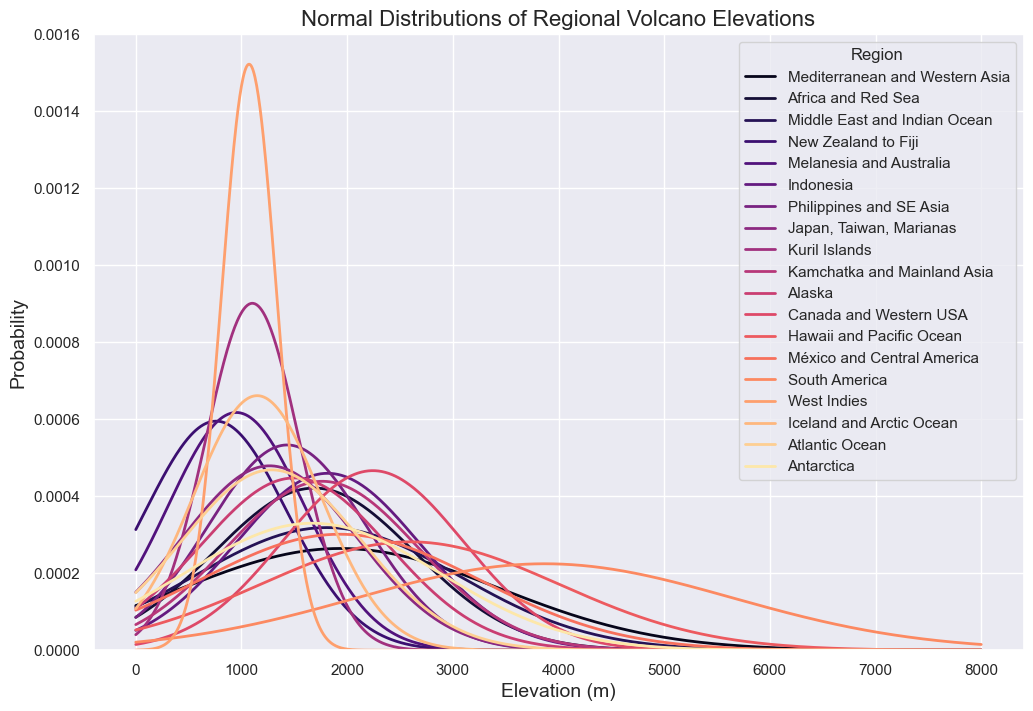

In [33]:
ax = None

# YOUR CODE HERE
import seaborn as sns
sns.set(style="darkgrid")
palette = sns.color_palette("magma", n_colors=len(gaussians.columns))  # you can also try "Set2", "coolwarm", etc.

# Create the plot
plt.figure(figsize=(12, 8))
ax = sns.lineplot(
    data=gaussians,
    palette=palette,
    dashes=False,  # ensures solid lines
    linewidth=2.0
)

# Customize plot
ax.set_title("Normal Distributions of Regional Volcano Elevations", fontsize=16)
ax.set_xlabel("Elevation (m)", fontsize=14)
ax.set_ylabel("Probability", fontsize=14)
ax.set_ylim(0.0, 0.0016)
ax.legend(title="Region")

plt.show()

**Figure 1. Normal (Gaussian) distributions of volcano elevations for each tectonic region.** 
*The curves represent the modeled probability density functions (PDFs) of volcanic summit elevations, calculated from regional mean and standard deviation values. Each solid line corresponds to a specific volcanic region, with colors assigned according to a viridis palette. Higher peaks indicate elevation ranges where volcanoes are most frequently found, while broader distributions reflect greater variability in volcanic edifice heights.*

### Part 6: Questions for Problem 3 (1 point)

1. How does the shape of the Gaussian distribution change for different values of the standard deviation?
2. Using this method of visualization, is it clear which regions have larger or smaller variations in average volcano elevation?

##### 1 The shape (width and height) of the Gaussian curve reflects the standard deviation (σ). Wider means a greater spread in data, resulting in higher deviation. Narrower means a lower spread of data resulting in lower STD.
##### 2. Yes. Regions with broader, flatter curves clearly have larger variations in volcano elevation (higher standard deviation), while those with sharper, taller peaks show smaller variations (lower standard deviation). This visualization effectively highlights the consistency or variability of volcano elevations across different tectonic regions.